# COVID-19 Spain - Active cases

First let's import the data:

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('https://covid19.isciii.es/resources/serie_historica_acumulados.csv',delimiter=',',encoding = 'unicode_escape')

df['FECHA']= pd.to_datetime(df['FECHA'], dayfirst = True)

In order to visualize the current situation in Spain, let's plot the cumulated cases in a stack plot as a sum of **current active cases**, people already recovered and cumulated deaths:

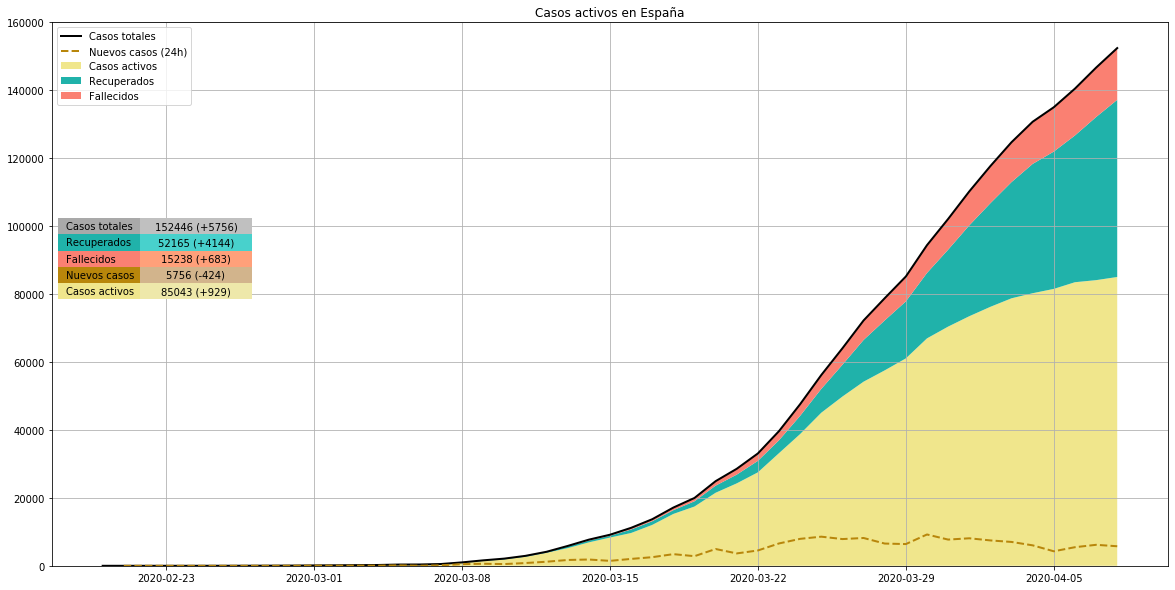

In [5]:
df2 = df.groupby('FECHA').sum()

Activos = df2.CASOS-df2.Fallecidos-df2.Recuperados
fig1 = plt.figure(1,figsize=(20,10))
ax1 = fig1.add_subplot(111)
ax1.set_title('Casos activos en España')
ax1.stackplot(df2.index,Activos,df2.Recuperados,df2.Fallecidos,colors = ['khaki','lightseagreen','salmon'], labels = ['Casos activos','Recuperados','Fallecidos'])
ax1.plot(df2.index,df2.CASOS,c='k',lineWidth = 2, label = 'Casos totales')
ax1.plot(df2.index,df2.CASOS.diff(),'--',c='darkgoldenrod',lineWidth = 2, label = 'Nuevos casos (24h)')
ax1.legend(loc = 2)
ax1.xaxis.set_major_locator(MultipleLocator(7))
ax1.grid()

row_labels=['Casos totales','Recuperados','Fallecidos','Nuevos casos','Casos activos']
table_vals=[['%d (%+d)'%(df2.CASOS[-1],df2.CASOS[-1]-df2.CASOS[-2])],
            ['%d (%+d)'%(df2.Recuperados[-1],df2.Recuperados[-1]-df2.Recuperados[-2])],
            ['%d (%+d)'%(df2.Fallecidos[-1],df2.Fallecidos[-1]-df2.Fallecidos[-2])],
            ['%d (%+d)'%(df2.CASOS.diff().iloc[-1],df2.CASOS.diff().iloc[-1]-df2.CASOS.diff().iloc[-2])],
            ['%d (%+d)'%(Activos[-1],Activos[-1]-Activos[-2])]]
table = ax1.table(cellText=table_vals,
          rowLabels=row_labels,
          bbox=(0.079,0.49,0.1,0.15),          
          edges = 'BRTL',
          cellColours = [['silver'],['mediumturquoise'],['lightsalmon'],['tan'],['palegoldenrod']],
          rowColours = ['darkgrey','lightseagreen','salmon','darkgoldenrod','khaki'],
          cellLoc = 'center',
          zorder = 100)
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)

Since the official information is given by Communities, we can perform the previous computation for any of the Spannish regions. Note that the region shall be given by its corresponding 2-letter ISO code. As an example, here you can see the plot for Catalonia (ISO code = CT):

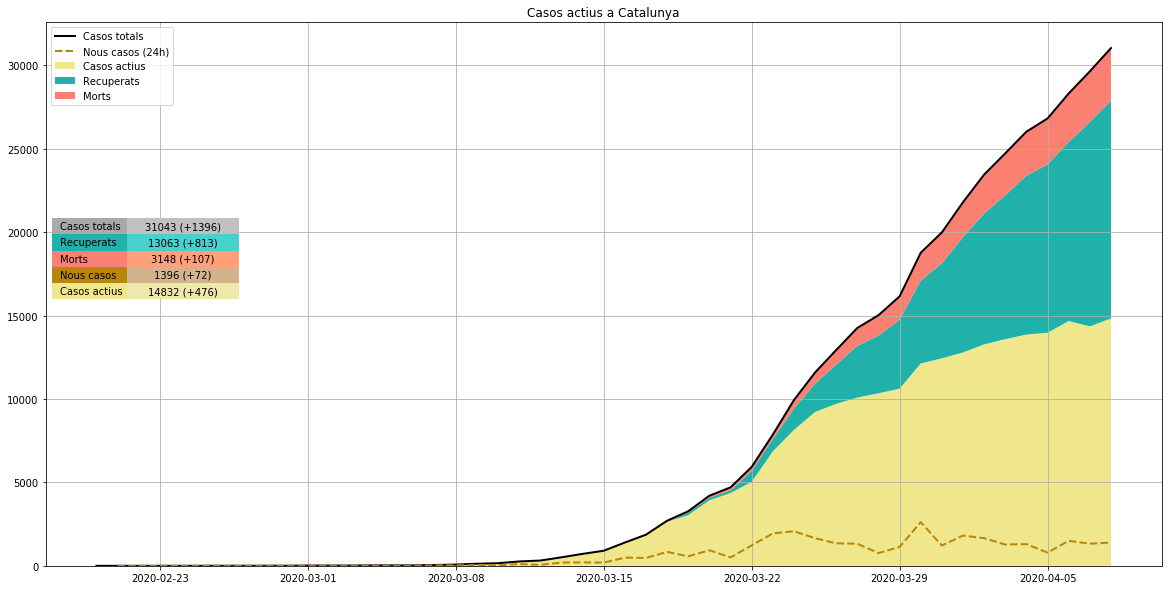

In [6]:
df3 = df[df['CCAA'] == 'CT'].fillna(0)

Activos = df3.CASOS-df3.Fallecidos-df3.Recuperados
fig2 = plt.figure(2,figsize=(20,10))
ax2 = fig2.add_subplot(111)
ax2.set_title('Casos actius a Catalunya')
ax2.stackplot(df3.FECHA,Activos,df3.Recuperados,df3.Fallecidos,colors = ['khaki','lightseagreen','salmon'], labels = ['Casos actius','Recuperats','Morts'])
ax2.plot(df3.FECHA,df3.CASOS,c='k',lineWidth = 2, label = 'Casos totals')
ax2.plot(df3.FECHA,df3.CASOS.diff(),'--',c='darkgoldenrod',lineWidth = 2, label = 'Nous casos (24h)')
ax2.legend(loc = 2)
ax2.xaxis.set_major_locator(MultipleLocator(7))
ax2.grid()

row_labels=['Casos totals','Recuperats','Morts','Nous casos','Casos actius']
table_vals=[['%d (%+d)'%(df3.CASOS.iloc[-1],df3.CASOS.iloc[-1]-df3.CASOS.iloc[-2])],
            ['%d (%+d)'%(df3.Recuperados.iloc[-1],df3.Recuperados.iloc[-1]-df3.Recuperados.iloc[-2])],
            ['%d (%+d)'%(df3.Fallecidos.iloc[-1],df3.Fallecidos.iloc[-1]-df3.Fallecidos.iloc[-2])],
            ['%d (%+d)'%(df3.CASOS.diff().iloc[-1],df3.CASOS.diff().iloc[-1]-df3.CASOS.diff().iloc[-2])],
            ['%d (%+d)'%(Activos.iloc[-1],Activos.iloc[-1]-Activos.iloc[-2])]]
table = ax2.table(cellText=table_vals,
          rowLabels=row_labels,
          bbox=(0.073,0.49,0.1,0.15),          
          edges = 'BRTL',
          cellColours = [['silver'],['mediumturquoise'],['lightsalmon'],['tan'],['palegoldenrod']],
          rowColours = ['darkgrey','lightseagreen','salmon','darkgoldenrod','khaki'],
          cellLoc = 'center',
          zorder = 100)
for key, cell in table.get_celld().items():
    cell.set_linewidth(0)